In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [3]:
df = pd.read_csv('vgames2.csv')

## *SECTION 1 / PROJECT 1*
---
<br>

## 🏴 **프로젝트 구성**

- **Part 0. Opening**  
  0-1. Planning background <br>
  0-2. Data Description

- **Part 1. EDA** <br>
  1-1. Missing value handling <br>
  1-2. Feature Engineering <br>

- **Part 2. Data Analysis**  <br>
  2-X. Questions

- **Part 3. business insight**<br>
  3-1. development planning

# **Part 0. Opening**

<img width='500' src='https://i.imgur.com/2RmPHz3.jpeg'>


## **0-1. Planning background**

전작 어드벤쳐 게임 ***'영웅의 길 : 영웅은 공부따윈 안한다네'*** 에서 <br>
좋은 평가와 괜찮은 매출을 보여준 덕에 기대를 받기 시작한 우리 개발팀,<br>
쏟아지는 신작게임들 사이에서 살아남고, 더 나아가서 높은 매출을 기대하려면 <br>
다음 분기에 어떤 게임을 어떤 사양으로 개발해야 할까요?<br>
주어진 힌트는 csv파일 단 하나!


**SYSTEM :: "퀘스트를 수락했습니다. 용사여 우리팀이 살아남기 위해 데이터를 
뽑아 들어라!"**


## **0-2. Data Description**

`Independent Variables:`

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

`Dependent Variables:`
- Global_Sales : 전세계의 출고량입니다.
- Sales_per_Titles : 퍼블리셔/장르별 출고량 평균입니다.


In [4]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
df.shape

(16598, 10)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [8]:
df = df.drop(['Unnamed: 0'], axis = 1) # 인덱스 대체 열 필요없으므로 삭제

> **⏭ Result**<br>
분석결과 중복되지 않은 총 <U>**16598개**</U> Title에 대한 데이터로,<br>
각 타이틀의 **개발비용이 포함되지 않았다는 아쉬운점**을 제외하면 <br>
충분히 큰 데이터로 분석할만한 가치가 있다고 생각됩니다.

# **Part 1. EDA**


## **1-1. Missing value handling**
> ⚠️***데이터에서 비어있는 공간을 처리하는과정***


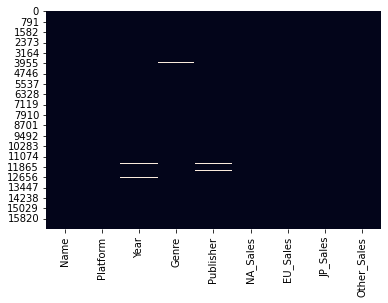

In [9]:
%matplotlib inline
sns.heatmap(df.isnull(), cbar=False) #결측치 시각화

In [10]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

> **💡 Decision**  
결측치가 있는 열이 Year, Genre, Publisher로 분석에 중요한 열이며,<br>
결측치를 검색을 통해 채워넣을수는 있으나 많은 노력이 필요할 것으로 예상됨 <br>
노력에 비해 결측치가 통계에 영향을 줄 정도로 많지않으므로 제거하기로 결정

In [11]:
df = df.dropna() # 결측치를 포함한 row가  통계에 영향을 줄정도로 크지않으므로 제거

In [12]:
df.Year = df.Year.round(0).astype(int) # 연도는 float 에서 int로 데이터타입 변경

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  object
 6   EU_Sales     16241 non-null  object
 7   JP_Sales     16241 non-null  object
 8   Other_Sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


> **⏭ Result**<br>
결측치(공백 데이터)를 처리한 후 확인한 데이터프레임(Excel의 Table라고 생각)에서<br>
모든 열의 데이터가 16241개의 공백이 아닌 데이터로 차있음을 확인할 수 있습니다.

## **1-2. Feature Engineering**
> ⚠️***기존 열의 조합으로 유용하게 쓰일 새로운 열을 만드는 과정***

In [14]:
df.loc[10] # index가 10인 row에 Sales 데이터 이상 확인

Name                  Ford Racing
Platform                       PS
Year                         2001
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     480K
EU_Sales                    0.33M
JP_Sales                       0K
Other_Sales                  0.06
Name: 10, dtype: object

In [15]:
notnum = df['NA_Sales'].str.contains('[a-zA-Z]') # 숫자가 아닌 M이나 K같은 자릿수 약식표현이 있는지 확인
df1 = df.loc[notnum]
print(df1.NA_Sales)

10        480K
45         60K
145         0K
447      0.58M
458      0.25M
         ...  
16330     720K
16408    0.53M
16482       0M
16492     470K
16578     320K
Name: NA_Sales, Length: 191, dtype: object


In [16]:
inc_NA_K = df['NA_Sales'].str.contains('[K]')
index_NA_K = df.loc[inc_NA_K].index # NA 출고량에 문자열 K가 포함된 row의 인덱스
inc_EU_K = df['EU_Sales'].str.contains('[K]')
index_EU_K = df.loc[inc_EU_K].index # EU 출고량에 문자열 K가 포함된 row의 인덱스
inc_JP_K = df['JP_Sales'].str.contains('[K]')
index_JP_K = df.loc[inc_JP_K].index # JP 출고량에 문자열 K가 포함된 row의 인덱스
inc_Ot_K = df['Other_Sales'].str.contains('[K]')
index_Ot_K = df.loc[inc_Ot_K].index # Other 출고량에 문자열 K가 포함된 row의 인덱스

In [17]:
df['NA_Sales'] = df['NA_Sales'].replace({'[K]':'','[M]':''}, regex=True) # 다른 row의 기본단위가 M이므로 K가 있는 열만 추후 1000분의1 해줄것
df['EU_Sales'] = df['EU_Sales'].replace({'[K]':'','[M]':''}, regex=True)
df['JP_Sales'] = df['JP_Sales'].replace({'[K]':'','[M]':''}, regex=True)
df['Other_Sales'] = df['Other_Sales'].replace({'[K]':'','[M]':''}, regex=True)

In [18]:
df = df.astype({'NA_Sales':'float','EU_Sales':'float','JP_Sales':'float','Other_Sales':'float'}) 

In [19]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [20]:
df.NA_Sales.loc[index_NA_K] = df.NA_Sales.loc[index_NA_K]*0.001
df.EU_Sales.loc[index_EU_K] = df.EU_Sales.loc[index_EU_K]*0.001
df.JP_Sales.loc[index_JP_K] = df.JP_Sales.loc[index_JP_K]*0.001
df.Other_Sales.loc[index_Ot_K] = df.Other_Sales.loc[index_Ot_K]*0.001

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df['Global_Sales'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales # 전체 출고량 비교를위한 컬럼 생성

In [22]:
df.Year = df.Year.round(0).astype(int) # 연도는 float 에서 int로 데이터타입 변경

In [23]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


> **⏭ Result**<br>
실수형태로 표현되어있던 연도를 정수형으로 변환하고,<br>
북미, 유럽, 일본, 나머지 지역의 출고량을 합산해서 새로운 열 Global_Sales 을 생성했습니다.<br>
이는 각 타이틀의 지역별 판매량 의존도, 혹은 장르별, 플랫폼별 출고량 비교에 이용할 수도 있어서 <br>
수출을 전제로 개발하는 우리 팀에겐 데이터를 해석하는데 중요한 지표로 활용될 수 있습니다.

# **Part 2. Data Analysis**

<img width='500' src='https://www.enerdata.co.kr/sites/default/files/images/market-analysis.jpg'>


## **2-0. Questions**
`business questions:`
- Q1. 연도별 게임의 트렌드가 있을까 **<*필수*>**<br>
  - 선호하는 장르의 트렌드 분석<br>
  - 선호하는 플랫폼의 트렌드 분석<br>
- Q2. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 **<*필수*>**<br>
  - 출고량 Top 100 타이틀 분석<br>
  - 출고량 Top 100 들의 Publisher 매출량 분석<br>
- Q3. 지역에 따라서 선호하는 게임 장르가 다를까 **<*필수*>**<br>


- Q4. 종합적인 실적이 좋은 Publisher가 선호하는 장르는?<br>
  - 실적이 좋은 Publisher는 어떤게임을 공급하나?<br>

## **2-1. Q1. 연도별 게임의 트렌드가 있을까?**
> ⚠️***장르와 플랫폼의 연도별 트렌드를 분석***

In [24]:
df[(df['Year'] < 2000) | (df['Year'] > 2016)].Year.value_counts() # 1999년 이하, 2017년 이상 연도별 row의 수

1998    374
1999    336
1997    287
1996    259
1995    215
1994    120
1993     60
1981     46
1992     43
1991     41
1982     36
1986     20
1983     17
1989     17
1990     16
1987     16
1988     15
1985     14
1984     14
11       10
9        10
8        10
1980      8
3         7
6         7
10        7
15        5
16        5
95        4
4         4
5         4
98        3
7         3
96        3
2017      3
2         3
0         3
1         2
14        2
97        2
13        2
12        2
86        1
2020      1
94        1
Name: Year, dtype: int64

In [25]:
df1 = df
x = df1[(df1['Year'] < 2000) | (df1['Year'] > 2016)].index 
df1.drop(x,axis='index',inplace=True) # 표본이 모자란 2017년 이후와 분석할 필요가 없는 2000년 미만 제거

> **💡 Decision**  
Year 열의 데이터 중, 연도라고는 할 수 없는 100 미만의 정수는 당연히 제외되어야합니다.<br>
2017년과 2020년에 타이틀이 각각 3,1개 확인되지만, 통계화하기엔 너무 적습니다.<br>
원본 데이터프레임 df의 변형을 방지하기 위해 df1을 선언해주고, <br>
현실적으로 통계에 의미있는 2000년부터 2016년까지의 데이터만 남기고 삭제합니다.

<h3><b> 2-1-1. 장르의 연도별 트렌드 분석 </b></h3>

In [26]:
Gen_Year = df1.groupby(['Year','Genre'], as_index = False)['Global_Sales'].sum()
Gen_Year # 12장르, 17년간의 표본이므로 204개의 row가 나와야하는데 203개 나오는걸로 보아 row 하나가 모자람

,Year,Genre,Global_Sales
0,2000,Action,33.89
1,2000,Adventure,2.96
2,2000,Fighting,20.26
3,2000,Misc,15.55
4,2000,Platform,15.96
...,...,...,...
198,2016,Role-Playing,6.75
199,2016,Shooter,13.97
200,2016,Simulation,0.39
201,2016,Sports,14.46


In [27]:
Gen_Year[Gen_Year['Year']==2016] # 16년에 Genre가 Puzzle인 데이터가 누락

,Year,Genre,Global_Sales
192,2016,Action,19.83
193,2016,Adventure,1.79
194,2016,Fighting,3.85
195,2016,Misc,1.09
196,2016,Platform,2.08
197,2016,Racing,1.62
198,2016,Role-Playing,6.75
199,2016,Shooter,13.97
200,2016,Simulation,0.39
201,2016,Sports,14.46


In [28]:
Gen_Year.loc[203] = [2016,'Puzzle',0.00] # 누락된 데이터 추가 (puzzle 장르의 출고량이 0 이기때문에 누락되었을 것으로 간주)

In [29]:
Gen_Year

,Year,Genre,Global_Sales
0,2000,Action,33.89
1,2000,Adventure,2.96
2,2000,Fighting,20.26
3,2000,Misc,15.55
4,2000,Platform,15.96
...,...,...,...
199,2016,Shooter,13.97
200,2016,Simulation,0.39
201,2016,Sports,14.46
202,2016,Strategy,0.52


In [30]:
x = Gen_Year[(Gen_Year['Genre'] == 'Stra') | (df1['Year'] > 2016)].index
df1.drop(x,axis='index',inplace=True)
Gen_Year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Year,Genre,Global_Sales
0,2000,Action,33.89
1,2000,Adventure,2.96
2,2000,Fighting,20.26
3,2000,Misc,15.55
4,2000,Platform,15.96
...,...,...,...
199,2016,Shooter,13.97
200,2016,Simulation,0.39
201,2016,Sports,14.46
202,2016,Strategy,0.52


In [31]:
Gen_Year.Genre = Gen_Year.Genre.str.replace('-','') # 장르이름에 하이픈 제거
Gen_Year.head(12)

,Year,Genre,Global_Sales
0,2000,Action,33.89
1,2000,Adventure,2.96
2,2000,Fighting,20.26
3,2000,Misc,15.55
4,2000,Platform,15.96
5,2000,Puzzle,3.83
6,2000,Racing,20.00
7,2000,RolePlaying,29.04
8,2000,Shooter,6.81
9,2000,Simulation,3.37


In [32]:
xs = range(2000, 2017)
genre = Gen_Year.Genre.unique()

for i in range(12):
  globals()['ys_'+genre[i]] = Gen_Year[Gen_Year['Genre']==genre[i]].Global_Sales

In [33]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [34]:
import matplotlib as mpl 
import matplotlib.font_manager as fm  
%matplotlib inline  
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


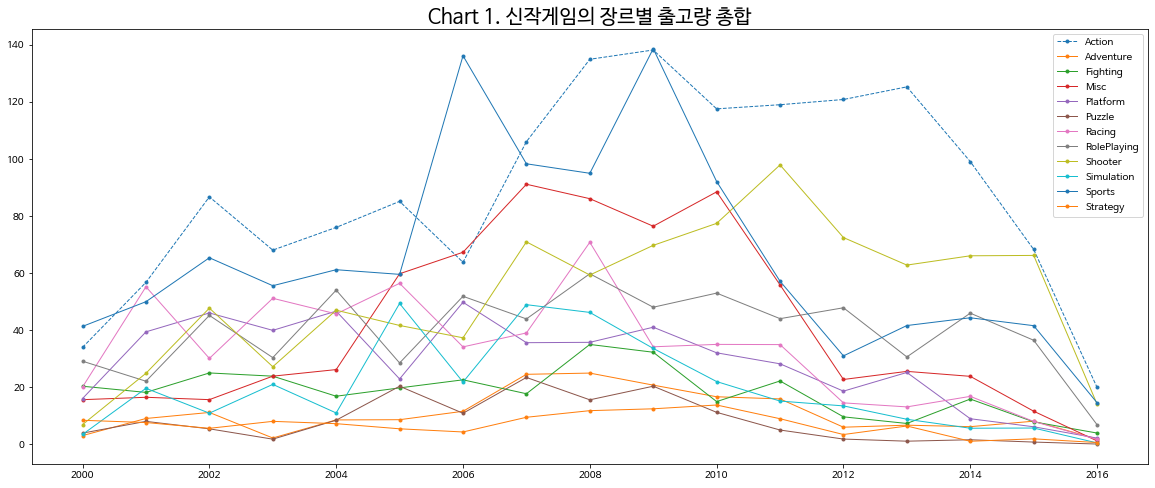

In [36]:
plt.figure(figsize=(20, 8))
plt.plot(xs, ys_Action, 'o--', ms=3, lw=1, label='Action')
plt.plot(xs, ys_Adventure, 'o-', ms=3, lw=1, label='Adventure')
plt.plot(xs, ys_Fighting, 'o-', ms=3, lw=1, label='Fighting')
plt.plot(xs, ys_Misc, 'o-', ms=3, lw=1, label='Misc')
plt.plot(xs, ys_Platform, 'o-', ms=3, lw=1, label='Platform')
plt.plot(xs, ys_Puzzle, 'o-', ms=3, lw=1, label='Puzzle')
plt.plot(xs, ys_Racing, 'o-', ms=3, lw=1, label='Racing')
plt.plot(xs, ys_RolePlaying, 'o-', ms=3, lw=1, label='RolePlaying')
plt.plot(xs, ys_Shooter, 'o-', ms=3, lw=1, label='Shooter')
plt.plot(xs, ys_Simulation, 'o-', ms=3, lw=1, label='Simulation')
plt.plot(xs, ys_Sports, 'o-', ms=3, lw=1, label='Sports')
plt.plot(xs, ys_Strategy, 'o-', ms=3, lw=1, label='Strategy')
plt.title("Chart 1. 신작게임의 장르별 출고량 총합", fontsize=20)
plt.legend()

> **⏭ result 1**<br>
위 차트는 장르의 연도별 출고량을 표현한 그래프로, <br>수요의 변화가 장기적인 관점에서 변화하고있지만 트렌드가 연도별로 급변하는것은 아니며, <br>
몇 년 단위의 수준으로 게임을 즐기는 세대가 변화함에 따라 
대세 장르가 서서히 변해간다고 볼 수 있다.<br>
추가로 액션 장르의경우, 지속적으로 큰 차이를 두고 출고량 1위라는 지표를
보여주고있으므로 소비시장이 가장 크다고 할 수 있다.<br>
최근의 데이터인 2015년과 2016년 기준으로 봐도 소비시장의 크기는 액션, 슈팅, 스포츠 순이다.

In [37]:
Gen_Sales = df1.groupby(['Year','Genre'], as_index = False).size()
Gen_Sales = Gen_Sales.rename(columns={'size':'Titles'})
Gen_Sales

,Year,Genre,Titles
0,2000,Action,43
1,2000,Adventure,16
2,2000,Fighting,29
3,2000,Misc,20
4,2000,Platform,23
...,...,...,...
198,2016,Role-Playing,40
199,2016,Shooter,31
200,2016,Simulation,9
201,2016,Sports,37


In [38]:
Gen_Sales.Genre = Gen_Sales.Genre.str.replace('-','') # 장르이름에 하이픈 제거

In [39]:
Gen_Sales.loc[203] = [2016,'Puzzle',0] # 누락된 데이터 추가 (puzzle 장르의 출고량이 0 이기때문에 누락되었을 것으로 간주)

In [40]:
Gen_Sales.tail(5)

,Year,Genre,Titles
199,2016,Shooter,31
200,2016,Simulation,9
201,2016,Sports,37
202,2016,Strategy,10
203,2016,Puzzle,0


In [41]:
xs = range(2000, 2017)
genre = Gen_Sales.Genre.unique()

for i in range(12):
  globals()['ys1_'+genre[i]] = Gen_Sales[Gen_Sales['Genre']==genre[i]].Titles

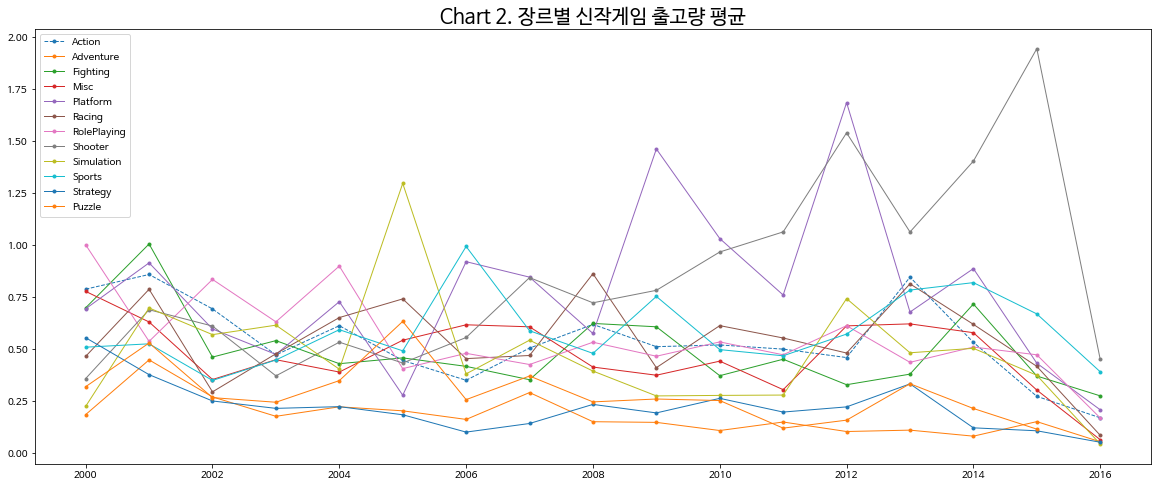

In [43]:
plt.figure(figsize=(20, 8))
plt.plot(xs, ys_Action/ys1_Action, 'o--', ms=3, lw=1, label='Action')
plt.plot(xs, ys_Adventure/ys1_Adventure, 'o-', ms=3, lw=1, label='Adventure')
plt.plot(xs, ys_Fighting/ys1_Fighting, 'o-', ms=3, lw=1, label='Fighting')
plt.plot(xs, ys_Misc/ys1_Misc, 'o-', ms=3, lw=1, label='Misc')
plt.plot(xs, ys_Platform/ys1_Platform, 'o-', ms=3, lw=1, label='Platform')
plt.plot(xs, ys_Racing/ys1_Racing, 'o-', ms=3, lw=1, label='Racing')
plt.plot(xs, ys_RolePlaying/ys1_RolePlaying, 'o-', ms=3, lw=1, label='RolePlaying')
plt.plot(xs, ys_Shooter/ys1_Shooter, 'o-', ms=3, lw=1, label='Shooter')
plt.plot(xs, ys_Simulation/ys1_Simulation, 'o-', ms=3, lw=1, label='Simulation')
plt.plot(xs, ys_Sports/ys1_Sports, 'o-', ms=3, lw=1, label='Sports')
plt.plot(xs, ys_Strategy/ys1_Strategy, 'o-', ms=3, lw=1, label='Strategy')
plt.plot(xs, ys_Puzzle/ys1_Puzzle, 'o-', ms=3, lw=1, label='Puzzle')
plt.title("Chart 2. 장르별 신작게임 출고량 평균", fontsize=20)
plt.legend()

> **⏭ result 2**<br>
다음은 장르의 타이틀 하나당 출고량의 그래프로, <br>
각 장르에 게임을 하나 발표했을때 평균적으로 얼마만큼의 수익을 기대할 수 있는지 예측할 수 있다.<br>
위 그래프에 따르면 2010년 부터 현재까지 슈팅게임이 수익성이 지속적으로 높아지기 시작했음을 알 수 있다.

<b><h3>*Q1-1. Conclusion</b></h3>
⏭ <U>result 1</U> 과 ⏭<U>result 2</U>를 통해 일반화하면

**<U>안정적인 투자의 관점</U>**에서 게임을 기획한다면, <br>근래 평균적으로 높은 수익을 보여주는 슈팅게임을 개발하는것이 좋고,

**<U>큰 수익성을 기대하는 투자의 관점</U>**에서 게임을 기획한다면, <br>2010년 부터 지속적으로 가장 큰 시장 추이를 보여주는 액션 게임을 개발하는것이 유리하다.

<h3><b> 2-1-2. 플랫폼의 연도별 트렌드 분석 </b></h3>

In [44]:
Pf_Sales = df1.groupby(['Year','Platform'], as_index = False).size()
Pf_Sales = Pf_Sales.rename(columns={'size':'Titles'})
Pf_Sales

,Year,Platform,Titles
0,2000,DC,20
1,2000,GB,16
2,2000,GBA,1
3,2000,N64,59
4,2000,PC,7
...,...,...,...
145,2016,PS4,105
146,2016,PSV,57
147,2016,WiiU,10
148,2016,X360,8


In [45]:
platform = Pf_Sales.Platform.unique() # 플랫폼의 종류가 시각화하기에 너무많음
platform

array(['DC', 'GB', 'GBA', 'N64', 'PC', 'PS', 'PS2', 'WS', 'XB', 'GC',
       'DS', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV', 'WiiU', 'PS4',
       'XOne'], dtype=object)

> **💡 Decision**  
2000년부터 2016년까지 출시한 게임 기준으로 플랫폼 종류가 20개나 존재합니다.<br>
우리가 플랫폼을 분석하는 이유는 어떤 플랫폼으로 내는것이 최근의 트렌드인지 분석하기 위함인 만큼<br>
가장 최근의 데이터인 2016년 기준 출시작이 있는 플랫폼과 단종된 플랫폼을 조사하여 시각화에 반영합니다.<br>


# **Reference**

<img width='500' src='https://i.imgur.com/7cNCUIy.jpeg'>

`domain knowledge`

- 데이터프레임기준(2016년까지) 단종된 Platform = 단종 날짜
 - WS - 원더스완 = 2003.02.18
 - PS - 플스1 단종 = 2006.03.24
 - PS2 - 플스2 단종 = 2013.01.04
 - PSP - 플레이스테이션포터블 = 2014.06.09
 - DC - 드림캐스트 = 2001.03.31
 - GB - 게임보이 = 2003.03.23
 - GBA - 게임보이어드밴스 = 2010.05.15
 - N64 - 닌텐도64 = 2002.04.30
 - GC - 게임큐브 = 2007.02.22
 - DS - 닌텐도DS = 2013.03.02
 - Wii - 닌텐도Wii = 2013.10.22
 - X360 - 엑스박스360 = 2016.04.20
 - XB - 엑스박스 = 2009.03.02

- 2017년 기준 생존해있는 Platform
 - PC
 - PS3 - 플스3  
 - PSV - 플레이스테이션비타 
 - PS4 - 플스4
 - WiiU - 닌텐도WiiU 
 - 3DS - 닌텐도3DS
 - Xone - 엑스박스 원

In [46]:
Pf_Sales[Pf_Sales['Year']==2016] # 2016년 기준 신작이 발표되고있는 플랫폼 조회

,Year,Platform,Titles
142,2016,3DS,34
143,2016,PC,38
144,2016,PS3,31
145,2016,PS4,105
146,2016,PSV,57
147,2016,WiiU,10
148,2016,X360,8
149,2016,XOne,54


> **💡 Decision**  
Pf_Sales에서 확인한 2016년기준 신작이 발표되고있는 플랫폼과 <br>
2017년 기준 생존해있는 플랫폼이라는 도메인 지식을 통해,<br>
PC, PS3, PS4, PSV, WiiU, 3DS, Xone, X360 다음 8개의 플랫폼을 시각화 대상으로 지정합니다.

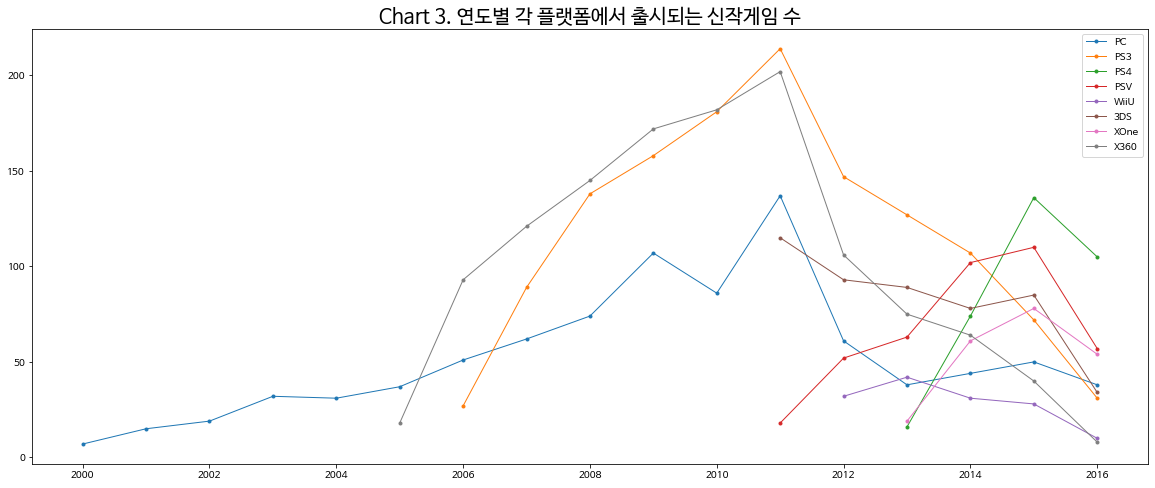

In [47]:
plt.figure(figsize=(20, 8))

P_PC = Pf_Sales[Pf_Sales['Platform']=='PC']
plt.plot(P_PC['Year'], P_PC['Titles'], 'o-', ms=3, lw=1, label='PC')

P_PS3 = Pf_Sales[Pf_Sales['Platform']=='PS3']
plt.plot(P_PS3['Year'], P_PS3['Titles'], 'o-', ms=3, lw=1, label='PS3')

P_PS4 = Pf_Sales[Pf_Sales['Platform']=='PS4']
plt.plot(P_PS4['Year'], P_PS4['Titles'], 'o-', ms=3, lw=1, label='PS4')

P_PSV = Pf_Sales[Pf_Sales['Platform']=='PSV']
plt.plot(P_PSV['Year'], P_PSV['Titles'], 'o-', ms=3, lw=1, label='PSV')

P_WiiU = Pf_Sales[Pf_Sales['Platform']=='WiiU']
plt.plot(P_WiiU['Year'], P_WiiU['Titles'], 'o-', ms=3, lw=1, label='WiiU')

P_3DS = Pf_Sales[Pf_Sales['Platform']=='3DS']
plt.plot(P_3DS['Year'], P_3DS['Titles'], 'o-', ms=3, lw=1, label='3DS')

P_XOne = Pf_Sales[Pf_Sales['Platform']=='XOne']
plt.plot(P_XOne['Year'], P_XOne['Titles'], 'o-', ms=3, lw=1, label='XOne')

P_X360 = Pf_Sales[Pf_Sales['Platform']=='X360']
plt.plot(P_X360['Year'], P_X360['Titles'], 'o-', ms=3, lw=1, label='X360')

plt.title("Chart 3. 연도별 각 플랫폼에서 출시되는 신작게임 수", fontsize=20)
plt.legend()

<b><h3>*Q1-2. Conclusion</b></h3>
☝ **<U>Chart 3</U>** 에 따르면 플랫폼의 트렌드는 대체로 명확하다고 할 수 있다.<br>
연도별 플랫폼의 트렌드를 살펴보면, 공통적으로 플랫폼 출시 후<br>
**<U>몇년안으로 피크를 찍고 완만하게 하강하는</U>** 형태를 보여주고있으며<br>
플랫폼별 생애주기의 너비 차이는 있어도 형태는 대체로 비슷하다.<br>
이에 미루어보아 **<U>상승세가 비교적 최근</U>**까지 이어진 것으로 보여지며 <br>
동시에 이전버전의 플랫폼인 PS3의 후광을 업을 것으로 예상되는 **<U>PS4</U>**로 설정하는것이 좋다.


## **Q1. ⚡Generalization⚡**
 **<h4><b>연도별 게임의 트렌드에 따르면 액션게임이나 슈팅게임을 PS4로 개발하는 것이 좋다.</b></h4>**

## **2-2. Q2. 출고량이 높은 게임에 대한 분석 및 시각화**

<h3><b> 2-2-1. 출고량 Top 100 분석 </b></h3>

In [48]:
df2 = df1[df1['Year'] >= 2013] # 위에서 설정한 8개 플랫폼이 다 포함되는구간은 2013년부터

In [49]:
df3 = df2.groupby(['Name','Publisher','Genre'], as_index = False)['Global_Sales'].sum() 
# 플랫폼만 다르고 타이틀은 같은 row의 Global_Sales를 합산해서 하나의 row로 생성
df3 = df3.sort_values('Global_Sales', ascending=False)
df3 # 같은타이틀끼리는 출고량을 다 합친 데이터프레임

,Name,Publisher,Genre,Global_Sales
396,Grand Theft Auto V,Take-Two Interactive,Action,55.92
119,Call of Duty: Ghosts,Activision,Shooter,27.37
118,Call of Duty: Black Ops 3,Activision,Shooter,25.30
117,Call of Duty: Advanced Warfare,Activision,Shooter,21.89
302,FIFA 15,Electronic Arts,Sports,19.02
...,...,...,...,...
838,"Sakigake!! Otokojuku - Nihon yo, Kore ga Otoko...",Namco Bandai Games,Fighting,0.01
845,Sangoku Koi Senki: Omoide Gaeshi - CS Edition,Prototype,Adventure,0.01
846,Satomi Hakkenden: Hachi Tamanoki,Quinrose,Adventure,0.01
848,Seisou no Amazones,Arc System Works,Role-Playing,0.01


In [50]:
top100 = df3.head(100)
top100g = top100.groupby(['Genre'], as_index = False).size()
top100g = top100g.rename(columns={'size':'Titles'}) # top100g 는 top100 게임의 장르별 타이틀갯수
top100g = top100g.sort_values('Titles', ascending=False)
top100t = top100.groupby(['Publisher'], as_index = False).size()
top100t = top100t.rename(columns={'size':'Titles'}) # top100t 는 퍼블리셔별 보유한 top 100 게임수
top100t = top100t.sort_values('Titles', ascending=False)
top100s = top100.groupby(['Publisher'], as_index = False)['Global_Sales'].sum()
top100s = top100s.sort_values('Global_Sales', ascending=False) # top100s 는 top 100 게임들의 퍼블리셔별 토탈 출고량

In [51]:
top100g # 2013년 이후 출시작중 top 100의 장르비중

,Genre,Titles
0,Action,31
7,Shooter,21
9,Sports,12
6,Role-Playing,11
3,Misc,7
4,Platform,6
5,Racing,5
2,Fighting,3
8,Simulation,3
1,Adventure,1


In [52]:
df3g = df3.groupby(['Genre'], as_index = False).size()
df3g = df3g.rename(columns={'size':'Titles'})
df3g = df3g.sort_values('Titles', ascending=False)
df3g # 2013년 이후 출시작의 장르비중

,Genre,Titles
0,Action,366
7,Role-Playing,200
1,Adventure,166
3,Misc,95
10,Sports,73
8,Shooter,68
2,Fighting,45
9,Simulation,43
11,Strategy,41
4,Platform,37


> **⏭ result**<br>
2013년 이후 전체 데이터프레임에선 액션, 롤플레잉, 어드벤쳐 3개 장르의 비중이 높은것으로 나온다.<br>
표본이 Top 100인 데이터프레임에선 액션, 슈팅, 스포츠 3개 장르의 비중이 높은것으로 보인다.<br>
***모수와 표본의 비율이 다르다는점에서 이 차이는 유의미한 정보가 될 것 같다.***

> **💡 Decision**  
기억해야 할 것은 표본이 Top 100인 데이터에서 얻은 Top 3 Genre인 액션 슈팅 스포츠는<br>chart1에서 결론내렸듯이 최근 2년간 출고량이 높은 3개 장르라는 점이다.<br>
하지만 chart2에 따르면 액션장르는 수익성은 낮은편이었다. <br>
chart 1과 2에 따르면 Top 100 작품에 들기 위해서는 수익성에 관계없이 <br>**시장성이 큰 장르만을 개발하는것이 유리**하다는 의미일까? **<U>가설을 세워서 증명해보자.</U>**

<h3><b> 2-2-1. 가설검정 </b></h3>
>⚠️(G3 = 액션, 슈팅, 스포츠 3개 Genre)

-  $H_{0}: \mu_{100} = \mu_{all}$ <br>
  -  Top 100 작품중 G3의 비중은 전체 작품중 G3의 비중과 같다.  <br>
(= 높은 수익성을 가진 게임이 되려면 시장에서의 장르 비중을 따라야 한다)


- $H_{a}: \mu_{100} \neq \mu_{all}$ <br>
  - Top 100 작품중 G3의 비중은 전체 작품중 G3의 비중과 다르다.  <br>
(= 높은 수익성을 가진 게임이 되려면 시장에서의 장르 비중과 달라야 한다.)

In [53]:
top3Genre = df3g[(df3g.Genre == 'Action') | (df3g.Genre == 'Shooter') | (df3g.Genre == 'Sports')].Titles.sum()
after2013 = df3g.Titles.sum()

In [54]:
top3G100 = top100g[(top100g.Genre == 'Action') | (top100g.Genre == 'Shooter') | (top100g.Genre == 'Sports')].Titles.sum()
top100all = top100g.Titles.sum()

In [55]:
print('2013년 이후 출시작중 3개장르 비율 (',top3Genre,':',after2013 - top3Genre,')')
print('top100 타이틀중 3개장르 비율 (',top3G100,':',top100all - top3G100,')')

2013년 이후 출시작중 3개장르 비율 ( 507 : 672 )
top100 타이틀중 3개장르 비율 ( 64 : 36 )


In [56]:
obs = pd.DataFrame({'전체':[507,672], 'Top100':[64,36]})
obs.index = ['3G','Other']
obs

,전체,Top100
3G,507,64
Other,672,36


In [57]:
from scipy.stats import chi2_contingency
result = chi2_contingency(obs, correction=False)
print('카이제곱 :',result[0])
print('p-value :',result[1])


카이제곱 : 16.445546933305593
p-value : 5.006765206541588e-05


<h3><b> 2-2-1. 가설검정 결과 </b></h3>
>⚠️p-value가 0.05보다 훨씬 낮으므로 귀무가설을 기각한다.<br>

- $H_{a}: \mu_{100} \neq \mu_{all}$ <br>
  - Top 100 작품중 G3의 비중은 전체 작품중 G3의 비중과 다르다.  <br>
(= 높은 수익성을 가진 게임이 되려면 시장에서의 장르 비중과 달라야 한다.)

<b><h3>*Q2-1. Conclusion</b></h3>
⏭<U>result</U> 에 따르면 
대립가설을 통해 높은 수익성을 가진 게임이 되려면 시장에서의 장르 비중과 달라야 한다는 결론을 내릴 수 있다. <br>
즉, 시장에서의 장르 비중과 다르게 액션, 슈팅, 스포츠 장르에 비중을 둘수록 높은 수익성을 기대할 수 있다.

<h3><b> 2-2-2. 출고량 Top 100 들의 Publisher 매출량 분석 </b></h3>

>Top100 타이틀을 낸 Publisher들의 최근 실적과, 어떤장르에 전문화되어있는지 알아본다.

In [58]:
df_top100 = pd.merge(top100t,top100s, how='outer',on='Publisher') # 두 데이터프레임을 outer merge
df_top100 = df_top100.sort_values('Global_Sales', ascending=False)
df_top100['Sales_per_Titles'] = df_top100.Global_Sales / df_top100.Titles # 타이틀 1건당 실적평균
df_top100

,Publisher,Titles,Global_Sales,Sales_per_Titles
0,Electronic Arts,16,133.53,8.345625
4,Activision,9,110.54,12.282222
6,Take-Two Interactive,7,85.79,12.255714
1,Ubisoft,14,81.00,5.785714
2,Nintendo,13,68.14,5.241538
3,Warner Bros. Interactive Entertainment,12,56.86,4.738333
5,Sony Computer Entertainment,7,26.04,3.720000
8,Bethesda Softworks,4,23.93,5.982500
7,Microsoft Game Studios,4,22.47,5.617500
11,Sony Computer Entertainment Europe,2,12.26,6.130000


In [59]:
upper20pub_GS = df_top100.Global_Sales[df_top100.Global_Sales > 20]
upper20pub_GS['Etc'] = df_top100.Global_Sales[df_top100.Global_Sales <= 20].sum()
upper20pub_Pub = df_top100.Publisher[df_top100.Global_Sales > 20]
upper20pub_Pub['Etc'] = 'Other'
upper20pub_T = df_top100.Titles[df_top100.Global_Sales > 20]
upper20pub_T['Etc'] = df_top100.Titles[df_top100.Global_Sales <= 20].sum()

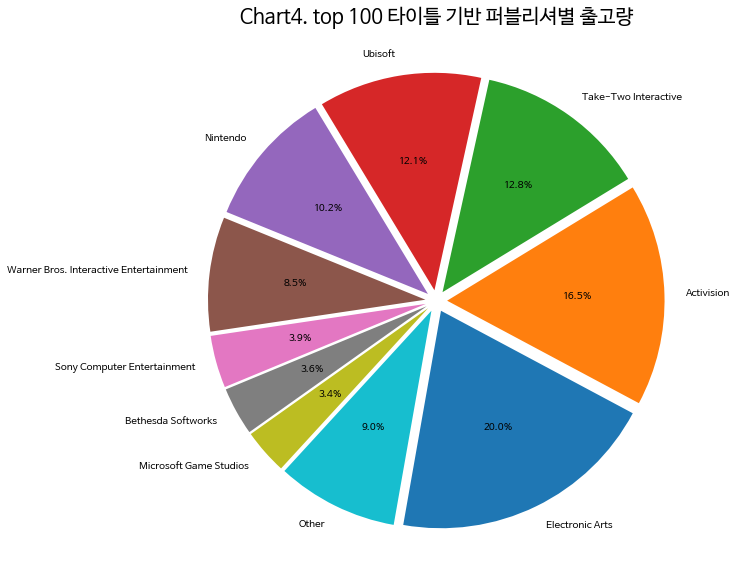

In [61]:
plt.figure(figsize=(10, 10))
ratio_s = upper20pub_GS
labels_s = upper20pub_Pub
explode = [0.05] * len(upper20pub_Pub)
plt.pie(ratio_s, labels=labels_s, autopct='%.1f%%', startangle=260, explode=explode)
#plt.legend(loc='upper right')
plt.title('Chart4. top 100 타이틀 기반 퍼블리셔별 출고량', fontsize=20)
plt.show()

> **⏭ result 1**<br>
Top 100 기준 출고량은 Electronic Arts,	Activision, Take-Two Interactive, Ubisoft, Nintendo	순임을 알 수 있음

Text(0.5, 1.0, 'Chart 5. Top 100 기준 타이틀 건당 실적평균')

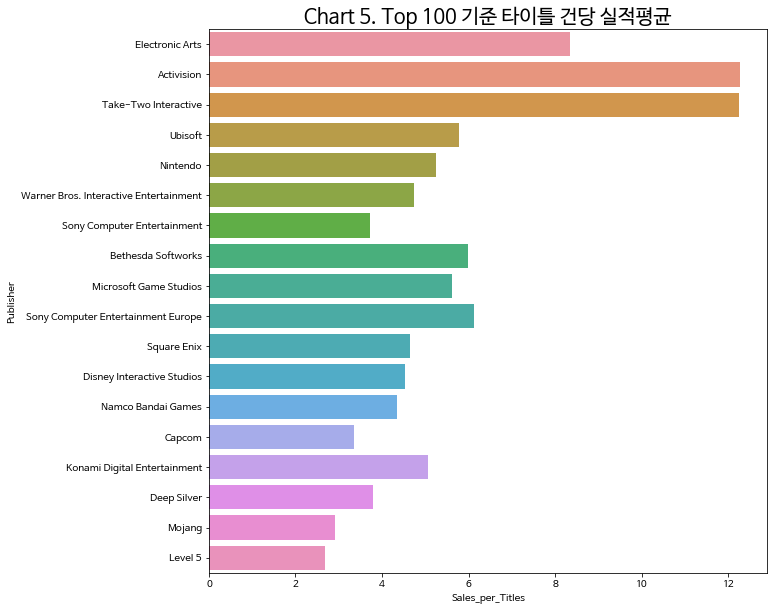

In [63]:
plt.figure(figsize=(10, 10))
x = sns.barplot(x = 'Sales_per_Titles', y = 'Publisher', data=df_top100)
x.set_title("Chart 5. Top 100 기준 타이틀 건당 실적평균", fontsize=20)

> **⏭ result 2**<br>
Top 100 기준 타이틀 건당 실적평균으로 보면 Activision, Take-Two Interactive가 Electronic Arts 보다 높아졌음을 알 수 있음.

Text(0.5, 1.0, 'Chart 6. 퍼블리셔별 총 출고량 대비 건당 평균 출고량')

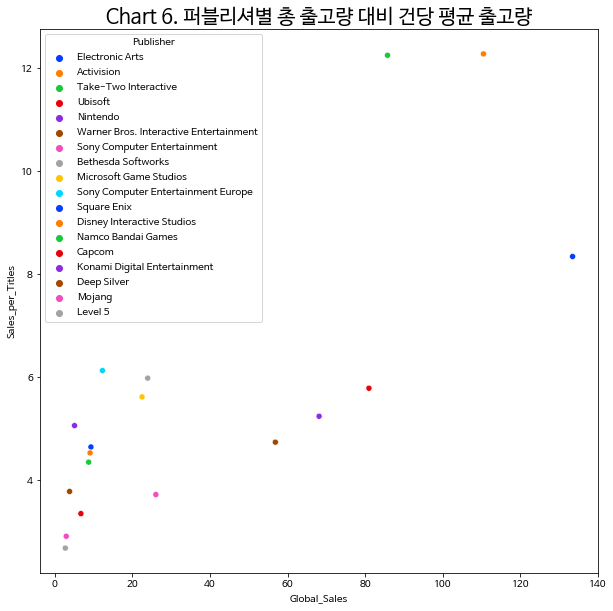

In [65]:
plt.figure(figsize=(10, 10))
y = sns.scatterplot(data = df_top100, x = 'Global_Sales', y = 'Sales_per_Titles', hue = 'Publisher' ,palette='bright')
y.set_title("Chart 6. 퍼블리셔별 총 출고량 대비 건당 평균 출고량", fontsize=20)

<b><h3>*Q2-2. Conclusion</b></h3>
⏭<U>result 2</U>와 <U>Chart 6</U>에 따르면 퍼블리셔별 총 출고량 순위와 퍼블리셔별 수주건수당 수익률 순위는 약상관관계에 있다고 할 수 있다.

 Activision과 Take-Two Interactive 는 수주건수당 수익률이 높으므로
<br> 우리팀이 수작의 게임을 하나 만들었을때, 높은 수익률을 가져다 줄 확률이 높다고 볼 수 있다.

## **Q2. ⚡Generalization⚡**
 **<h4><b> 3G 게임으로 Activision이나 Take-Two Interactive에 퍼블리싱을 맡기는편이 높은 수익률을 가져다 줄 확률이 높다.</b></h4>**

## **2-3. Q3. 지역에 따라 선호하는 게임이 다를까?**
> ⚠️대조군 : NA(북미), EU(유럽), JP(일본), Other(이외지역) 4개

<img width='500' src='https://i.imgur.com/z1Gclsi.jpeg'>

Text(0.5, 1.0, 'Other')

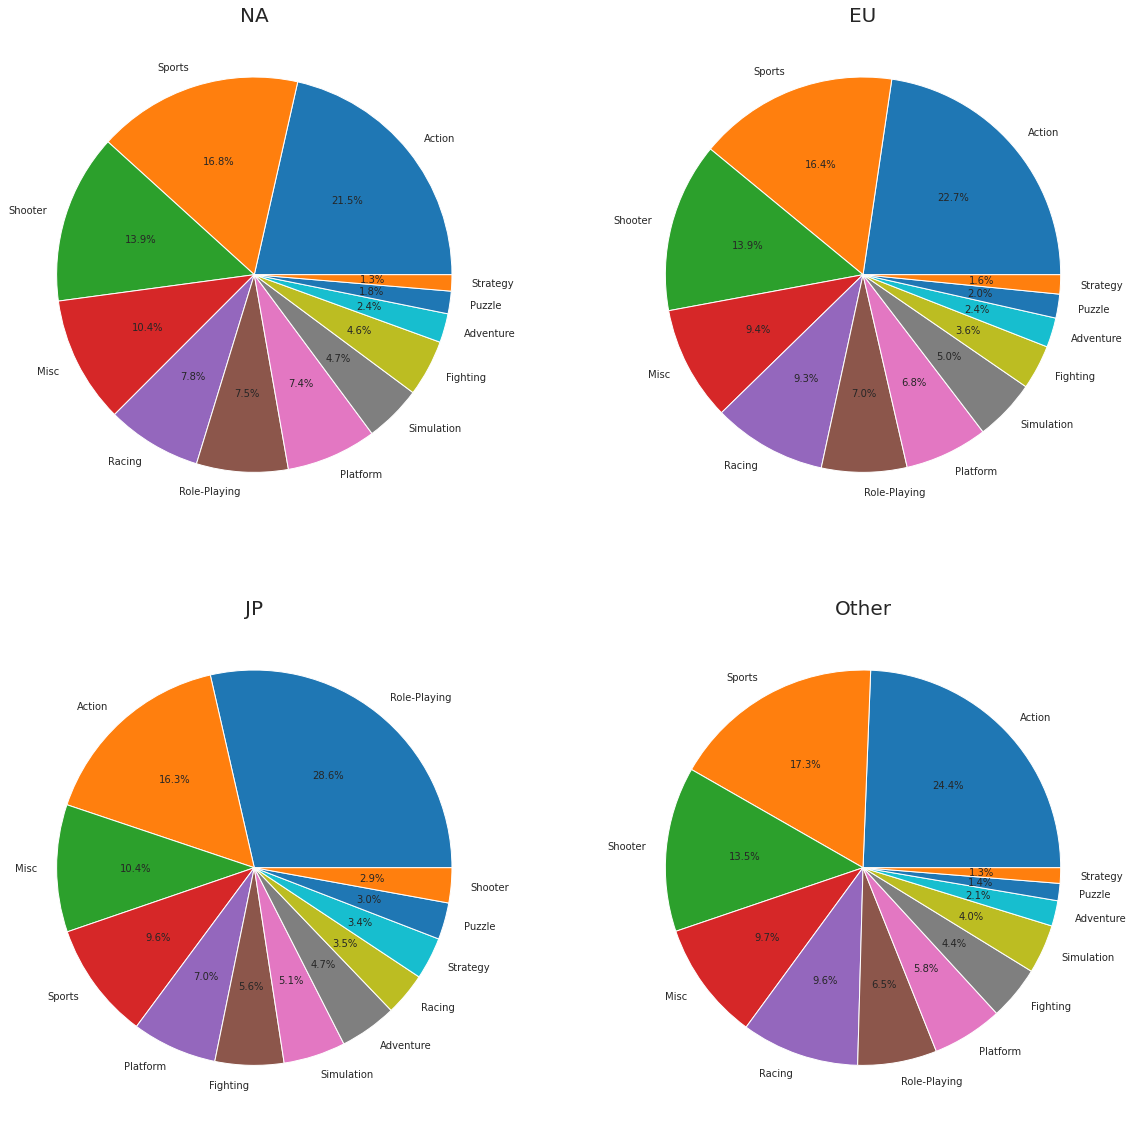

In [68]:
NA_Genre = df1.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending=False).to_frame()
NA_Genre['loc']= 'NA'
NA_Genre = NA_Genre.rename(columns={'NA_Sales':'Sales'})
EU_Genre = df1.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending=False).to_frame()
EU_Genre['loc']= 'EU'
EU_Genre = EU_Genre.rename(columns={'EU_Sales':'Sales'})
JP_Genre = df1.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False).to_frame()
JP_Genre['loc']= 'JP'
JP_Genre = JP_Genre.rename(columns={'JP_Sales':'Sales'})
Ot_Genre = df1.groupby(['Genre'])['Other_Sales'].sum().sort_values(ascending=False).to_frame()
Ot_Genre['loc']= 'Other'
Ot_Genre = Ot_Genre.rename(columns={'Other_Sales':'Sales'})
Glo_Genre = pd.concat([NA_Genre,EU_Genre,JP_Genre,Ot_Genre])

Glo_Genre[Glo_Genre['loc']=='NA']

ratio_NA = Glo_Genre.Sales[Glo_Genre['loc']=='NA']
labels_NA = Glo_Genre[Glo_Genre['loc']=='NA'].index
ratio_EU = Glo_Genre.Sales[Glo_Genre['loc']=='EU']
labels_EU = Glo_Genre[Glo_Genre['loc']=='EU'].index
ratio_JP = Glo_Genre.Sales[Glo_Genre['loc']=='JP']
labels_JP = Glo_Genre[Glo_Genre['loc']=='JP'].index
ratio_Ot = Glo_Genre.Sales[Glo_Genre['loc']=='Other']
labels_Ot = Glo_Genre[Glo_Genre['loc']=='Other'].index
explode = [0.05] * len(Glo_Genre[Glo_Genre['loc']=='NA'])
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,20))

plt.subplot(221)
plt.pie(ratio_NA, labels=labels_NA, autopct='%.1f%%')
plt.title('NA', fontsize=20)

plt.subplot(222)
plt.pie(ratio_EU, labels=labels_EU, autopct='%.1f%%')
plt.title('EU', fontsize=20)

plt.subplot(223)
plt.pie(ratio_JP, labels=labels_JP, autopct='%.1f%%')
plt.title('JP', fontsize=20)

plt.subplot(224)
plt.pie(ratio_Ot, labels=labels_Ot, autopct='%.1f%%')
plt.title('Other', fontsize=20)

> **💡 Decision**  
일본은 장르 선호도가 타지역과 매우 다른것을 시각화 자료로도 충분히 분석할 수 있다.<br>
확실하게 결론을 내리기위해 가설검정을 통해 확실하게 추론하기로 한다.

<h3><b> 2-3. 가설검정 </b></h3>

-  $H_{0}: \mu_{A} = \mu_{B}$ <br>
  -  A 지역과 B지역의 선호하는 게임의 차이가 없다<br>
    (= 지역마다 선호하는 장르가 같다)


- $H_{a}: \mu_{A} \neq \mu_{B}$ <br>
  -  A 지역과 B지역의 선호하는 게임의 차이가 있다.<br>
    (= 지역마다 선호하는 장르가 다르다)

In [69]:
NA_Genre = df1.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending=False).to_frame()
EU_Genre = df1.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending=False).to_frame()
JP_Genre = df1.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False).to_frame()
Ot_Genre = df1.groupby(['Genre'])['Other_Sales'].sum().sort_values(ascending=False).to_frame()

In [70]:
Glo_Genre = pd.concat([NA_Genre.T,EU_Genre.T])

In [71]:
Glo_Genre # 북미와 유럽의 비교 데이터프레임

Genre,Action,Sports,Shooter,Misc,Racing,Role-Playing,Platform,Simulation,Fighting,Adventure,Puzzle,Strategy
NA_Sales,745.37,583.00,481.29,360.05,269.75,259.96,256.29,162.54,160.38,82.41,64.02,46.15
EU_Sales,468.26,337.98,286.76,193.80,192.25,144.18,140.18,104.03,75.23,49.93,40.36,32.46


In [72]:
print('p-value:',chi2_contingency(Glo_Genre)[1])

p-value: 0.4513897470244065


> **⏭ result 1**<br>
귀무가설을 기각할 수 없으므로, 
**<U>북미와 유럽은 선호하는 장르의 차이가 없다</U>**고 할 수 있다.

In [73]:
Glo_Genre = pd.concat([NA_Genre.T,JP_Genre.T])

In [74]:
Glo_Genre

Genre,Action,Sports,Shooter,Misc,Racing,Role-Playing,Platform,Simulation,Fighting,Adventure,Puzzle,Strategy
NA_Sales,745.37,583.00,481.29,360.05,269.75,259.96,256.29,162.54,160.38,82.41,64.02,46.15
JP_Sales,128.23,75.53,22.56,82.12,27.72,225.22,54.83,39.98,44.30,36.89,23.69,27.17


In [75]:
print('p-value:',chi2_contingency(Glo_Genre)[1])

p-value: 1.6151834539127328e-78


> **⏭ result 2**<br>
귀무가설을 기각한다.
**<U>북미와 일본은 선호하는 장르에 차이가 있다</U>**고 할 수 있다.

In [76]:
Glo_Genre = pd.concat([EU_Genre.T,JP_Genre.T])

In [77]:
Glo_Genre

Genre,Action,Sports,Shooter,Misc,Racing,Role-Playing,Platform,Simulation,Fighting,Adventure,Puzzle,Strategy
EU_Sales,468.26,337.98,286.76,193.80,192.25,144.18,140.18,104.03,75.23,49.93,40.36,32.46
JP_Sales,128.23,75.53,22.56,82.12,27.72,225.22,54.83,39.98,44.30,36.89,23.69,27.17


In [78]:
print('p-value:',chi2_contingency(Glo_Genre)[1])

p-value: 1.1512464997281345e-68


> **⏭ result 3**<br>
귀무가설을 기각한다.
**<U>유럽과 일본은 선호하는 장르에 차이가 있다</U>**고 할 수 있다.

In [79]:
Glo_Genre = pd.concat([NA_Genre.T,EU_Genre.T,Ot_Genre.T])

In [80]:
Glo_Genre

Genre,Action,Sports,Shooter,Misc,Racing,Role-Playing,Platform,Simulation,Fighting,Adventure,Puzzle,Strategy
NA_Sales,745.37,583.00,481.29,360.05,269.75,259.96,256.29,162.54,160.38,82.41,64.02,46.15
EU_Sales,468.26,337.98,286.76,193.80,192.25,144.18,140.18,104.03,75.23,49.93,40.36,32.46
Other_Sales,176.55,125.60,97.66,70.38,69.78,46.93,41.75,29.03,31.96,15.09,10.21,9.19


In [81]:
print('p-value:',chi2_contingency(Glo_Genre)[1])

p-value: 0.6687164478492735


> **⏭ result 4**<br>
귀무가설을 기각할 수 없으므로, 
**<U>일본을 제외한 나머지 지역은 선호하는 장르의 차이가 없다</U>**고 할 수 있다.


<b><h3>*Q3. Conclusion*</b></h3>

⏭<U>result 2,3,4</U>를 근거로 해석하면, **<U>일본만 선호하는 장르가 다르다</U>**고 할 수 있다.<br>
일본을 타겟으로 하려면 다른지역과 다른전략을 고려할 필요가 있을것으로 보인다.

In [82]:
all_Sales = NA_Genre.values.sum() + EU_Genre.values.sum() + JP_Genre.values.sum() + Ot_Genre.values.sum()
print('일본 게임시장은 전세계의',round(JP_Genre.values.sum() / all_Sales * 100,2),'퍼센트를 차지한다')

일본 게임시장은 전세계의 11.18 퍼센트를 차지한다


## **Q3. ⚡Generalization⚡**
<img width='500' src='https://rimage.gnst.jp/livejapan.com/public/article/detail/a/00/01/a0001028/img/ko/a0001028_parts_58a16ee385c56.jpg?20200326182416&q=80'>
 <h4><b> 전세계 출고량의 11%를 차지하는 일본을 제외한 나머지 소비자군은 선호하는 장르가 같기 때문에<br> 전 세계 공통전략으로 게임의 수익성을 기획하더라도 글로벌 시장에 통할 가능성이 높다.</b></h4>

## **2-4. Q4. 종합적인 실적이 좋은 Publisher가 선호하는 장르는?**
> ⚠️***실적이 좋은 Publisher는 어떤게임을 공급하나?***


In [83]:
top2Act = df3[df3.Publisher=='Activision']
top2TTI = df3[df3.Publisher=='Take-Two Interactive']

In [84]:
top2Act1 = top2Act.groupby(['Genre'], as_index = False)['Global_Sales'].size()
top2Act1 = top2Act1.sort_values('size',ascending=False)
top2Act1 = top2Act1.rename(columns={'size':'Activision'})

In [85]:
top2TTI1 = top2TTI.groupby(['Genre'], as_index = False)['Global_Sales'].size()
top2TTI1 = top2TTI1.sort_values('size',ascending=False)
top2TTI1 = top2TTI1.rename(columns={'size':'Take_Two'})

In [86]:
top2pub = pd.merge(top2Act1,top2TTI1, how='outer',on='Genre') 
top2pub.Take_Two = top2pub.Take_Two.fillna(0)
top2pub['Take_Two'] = top2pub['Take_Two'].astype(int)

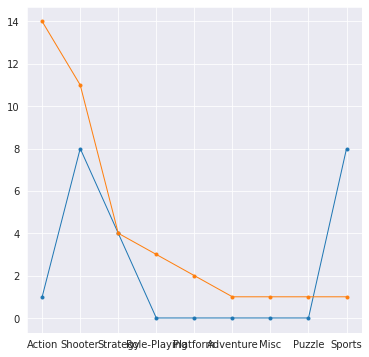

In [87]:
plt.figure(figsize=(6, 6))
sns.color_palette("pastel")

plt.plot(top2pub['Genre'], top2pub['Take_Two'], 'o-', ms=3, lw=1, label='Take_Two')
plt.plot(top2pub['Genre'], top2pub['Activision'], 'o-', ms=3, lw=1, label='Activision')

> **⏭ result**<br>
두 퍼블리셔의 전문분야<br>
- both Publisher : 슈팅<br>
- Activision : 액션<br>
- Take-Two Interactive : 스포츠

## **Q4. ⚡Generalization⚡**
 **<h4><b> 두 Publisher의 선호장르는 슈팅, 액션, 스포츠이며 공통적으로 슈팅게임을 선호한다.</b></h4>**

# **Part 3. business insight**

<img width='500' src='https://storylytics.ca/wp-content/uploads/2020/12/define-insight.png'>

## **3-1. development planning**

>**⚡Generalization⚡ 모아보기** <br>
Q1. 연도별 게임의 트렌드에 따르면 액션게임이나 슈팅게임을 PS4로 개발하는 것이 좋다.<br>
Q2. 3G 게임으로 Activision이나 Take-Two Interactive에 퍼블리싱을 맡기는편이 높은 수익률을 가져다 줄 확률이 높다.<br>
Q3. 일본을 제외하면 선호하는 장르가 같기 때문에 전 세계 공통전략으로 게임의 수익성을 기획하더라도 글로벌 시장에 통할 가능성이 높다.<br>
Q4. 두 Publisher의 선호장르는 슈팅, 액션, 스포츠이며 공통적으로 슈팅게임을 선호한다.

### **Business Insight**
1. 플랫폼 `Platform`
  - 상승세가 비교적 최근까지 이어졌으며, 한때 플랫폼을 독점하다시피 한 <br>PS3의 후광을 업은 후속작인 PS4가 현재 가장 트렌디한 플랫폼으로 분석됨

2. 장르 `Genre`
  - 안정적인 투자의 관점에선 슈팅게임을 개발하는것이 좋고, 큰 수익성을 기대하는 <br>투자의 관점에선 가장 큰 시장 추이를 보여주는 액션 게임을 개발하는것이 유리하다.

3. 시장 `market`
  - 글로벌의 11% 비중을 차지하는 일본시장은 염두에 두지 않고,<br> 나머지 89%의 시장에 중점을 둔 공통전략을 수립한다.

4. 배포사 `Publisher`
  - 퍼블리싱 의뢰는 각 배포사의 선호장르에 맞는 퍼블리셔를 최우선적으로 고려한다.